# Detección de Rostros con Haar Cascades

Haar Cascades es uno de los algoritmos más antiguos (pero aún útiles) para la detección de objetos. Afortunadamente, OpenCV viene con varios modelos pre-entrenados que podemos utilizara con distintos propósitos.

En este notebook usaremos Haar Cascades para detectar múltiples caras en una fotografía.

## Preliminares

Empecemos importando las librerías que necesitaremos.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Cargando la Imagen

Carguemos la imagen que usaremos para la detección facial. Carguémosla a color primero.

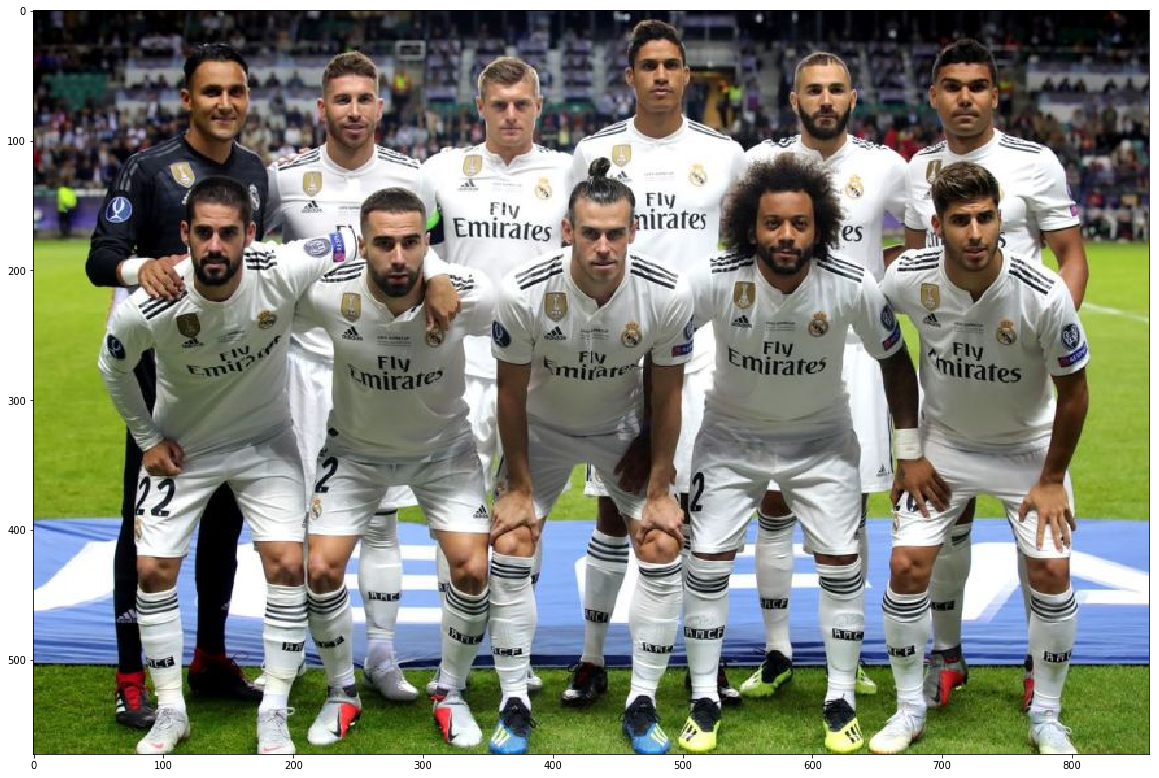

In [2]:
image = cv2.imread('images/Real-Madrid.jpg')

# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.imshow(image)

Dado que el rostro humano contiene bastantes características no dependientes del color, podemos convertir nuestra imagen a escala de grises sin problema alguno.

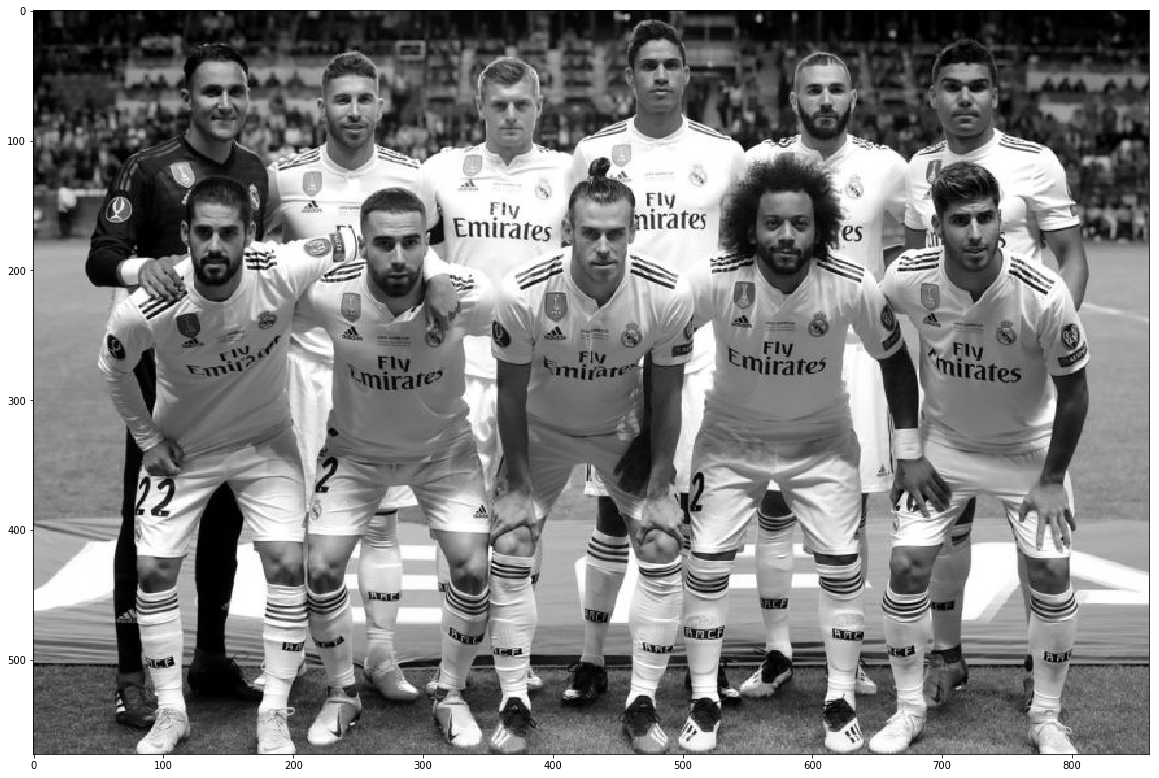

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 20))
plt.imshow(gray, cmap='gray')

## Cargando el Modelo Pre-Entrenado

Carguemos un modelo pre-entrenado para detectar múltiples caras en una imagen. Los pesos/parámetros de este modelo están en el archivo `detector_architectures/haarcascade_frontalface_default.xml`. 

Es importante mencionar que el número de rostros detectados está gobernado por la función `detectMultiScale` y sus entradas: `image`, `scaleFactor`, `minNeighbors`. Típicamente, con valores bajos de `scaleFactor` y `minNeighbors` podemos identificar más rostros, pero valores más altos tienden a producir mejores resultados.

In [4]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Run on the grayscale image
faces = face_cascade.detectMultiScale(gray, 2, 6)

El clasificador nos devuelve un arreglo de recuadros delimitadores para cada cara encontrada en la imagen.

In [5]:
print(f'{len(faces)} found.')
print('Coordinates in the following format: (X, Y, width, height)')
print('=============================')
print(faces)

10 found.
Coordinates in the following format: (X, Y, width, height)
[[587  44  48  48]
 [694  41  48  48]
 [460  24  48  48]
 [123  46  48  48]
 [224  51  48  48]
 [344  55  48  48]
 [701 144  48  48]
 [556 146  48  48]
 [116 155  48  48]
 [416 156  48  48]]


## Dibujando los Cuadros Delimitadores Alrededor de los Rostros Detectados 

Finalmente, dibujemos los cuadros que nuestro algoritmo encontró encima de la imagen original para ver si dichas detecciones tienen sentido.

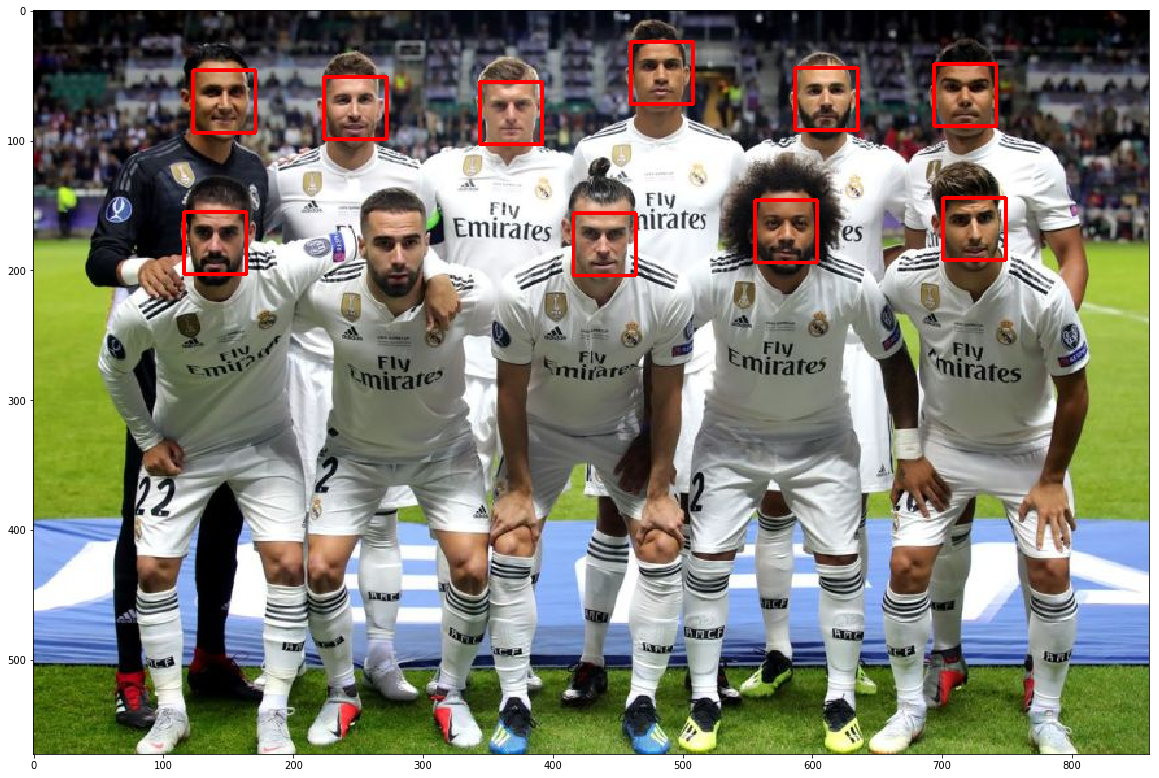

In [6]:
image_with_detections = np.copy(image)

for (x, y, width, height) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + width, y + height), (255, 0, 0), 2)
    
plt.figure(figsize=(20, 20))
plt.imshow(image_with_detections)

Encontró 10 de 11 caras. ¡No está mal!

Jugar un poco con los parámetros posiblemente produzca un mejor resultado.